###Stack Overflow is a question and answer website for programmers.The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down  and edit questions and answers.

### Installing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

###Dataset
The dataset contains responses to an annual survey conducted by StackOverflow. There are three files in the dataset.
README.txt - Information about the dataset
survey_results_schema.csv - The list of questions, and shortcodes for each question
survey_results_public.csv - The full list of responses to the questions

In [ ]:
survey_raw_df = pd.read_csv('/content/survey_results_public.csv')

In [ ]:
survey_raw_df.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [ ]:
survey_raw_df.shape

(64461, 61)

####Dataset contains the responses of 64461 persons against 61 questions.

#### Lets view the columns in dataframe.

In [ ]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

#### We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText. 

In [ ]:
schema_raw = pd.read_csv('/content/survey_results_schema.csv', index_col='Column').QuestionText

In [ ]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation and Cleaning

###While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

Demographics of the survey respondents and the global programming community

Way of learning in programming

Perspective change with coding experience

Let's select a subset of columns with the relevant data for our analysis

In [ ]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    # Employment
    'Employment',
    'DevType',
    #Learning
    'NEWLearn',
    'NEWPurpleLink',
    'NEWJobHuntResearch',
    'NEWEdImpt',
    'NEWStuck'
]

In [ ]:
len(selected_columns)

16

#### Let's extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [ ]:
survey_df = survey_raw_df[selected_columns].copy()

In [ ]:
schema = schema_raw[selected_columns]

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             64072 non-null  object 
 1   Age                 45446 non-null  float64
 2   Gender              50557 non-null  object 
 3   EdLevel             57431 non-null  object 
 4   UndergradMajor      50995 non-null  object 
 5   Hobbyist            64416 non-null  object 
 6   Age1stCode          57900 non-null  object 
 7   YearsCode           57684 non-null  object 
 8   YearsCodePro        46349 non-null  object 
 9   Employment          63854 non-null  object 
 10  DevType             49370 non-null  object 
 11  NEWLearn            56156 non-null  object 
 12  NEWPurpleLink       54803 non-null  object 
 13  NEWJobHuntResearch  41022 non-null  object 
 14  NEWEdImpt           48465 non-null  object 
 15  NEWStuck            54983 non-null  object 
dtypes: f

##### Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

##### Only one of the columns were detected as numeric columns (Age), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [ ]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

#### Let's now view some basic statistics about numeric columns.

In [ ]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro
count,45446.000000,57473.000000,56784.000000,44133.000000
mean,30.834111,15.476572,12.782051,8.869667
std,9.585392,5.114081,9.490657,7.759961
min,1.000000,5.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000
50%,29.000000,15.000000,10.000000,6.000000
75%,35.000000,18.000000,17.000000,12.000000
max,279.000000,85.000000,50.000000,50.000000


#### There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.

In [ ]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

#### The gender column also allows for picking multiple options. I removed values containing more than one option to simplify our analysis.

In [ ]:
survey_df['Gender'].value_counts()

Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [ ]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

#### We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [ ]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,Employment,DevType,NEWLearn,NEWPurpleLink,NEWJobHuntResearch,NEWEdImpt,NEWStuck
21666,Germany,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,10.0,23.0,8.0,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",Once a year,"Hello, old friend","Read company media, such as employee blogs or ...",Fairly important,Visit Stack Overflow;Watch help / tutorial vid...
32355,Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,No,14.0,10.0,6.0,Employed full-time,"Designer;Developer, back-end;Developer, deskto...",Once a year,"Hello, old friend","Read company media, such as employee blogs or ...",Somewhat important,Play games;Call a coworker or friend;Visit Sta...
3561,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,13.0,20.0,NaN,"Independent contractor, freelancer, or self-em...",Marketing or sales professional,Once every few years,Amused,NaN,NaN,Play games;Do other work and come back later
12729,Norway,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,16.0,5.0,Employed full-time,"Developer, full-stack;DevOps specialist",Once every few years,Amused,"Read company media, such as employee blogs or ...",Very important,Call a coworker or friend;Visit Stack Overflow...
41135,Spain,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Employed full-time,NaN,Once a year,"Hello, old friend",NaN,NaN,Visit Stack Overflow
61855,India,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
12732,Iran,32.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,12.0,4.0,NaN,Student,NaN,Once a year,"Hello, old friend",NaN,NaN,Visit Stack Overflow
61593,Philippines,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,No,20.0,10.0,NaN,"Not employed, but looking for work","Database administrator;Developer, back-end;Dev...",Once every few years,Annoyed,"Read company media, such as employee blogs or ...",Fairly important,Call a coworker or friend;Visit Stack Overflow...
62818,Tunisia,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,NaN,NaN,NaN,Student,NaN,Every few months,"Hello, old friend",NaN,NaN,Visit Stack Overflow
43093,France,63.0,Woman,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,42.0,37.0,Employed full-time,Academic researcher,Once every few years,Indifferent,"Read other media like news articles, founder p...",Critically important,Call a coworker or friend


#### Exploratory Analysis and Visualization
######Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community.

## Country

In [ ]:
schema.Country

'Where do you live?'

In [ ]:
survey_df.Country.nunique()

183

In [ ]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8371
United Kingdom         3883
Germany                3875
Canada                 2177
France                 1889
Brazil                 1811
Netherlands            1333
Poland                 1274
Australia              1199
Spain                  1158
Italy                  1117
Russian Federation     1086
Sweden                  881
Pakistan                803
Name: Country, dtype: int64

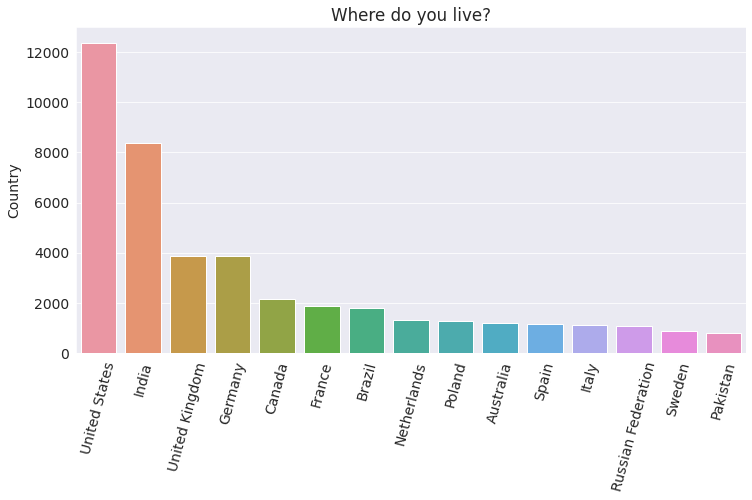

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

######It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.


## Age

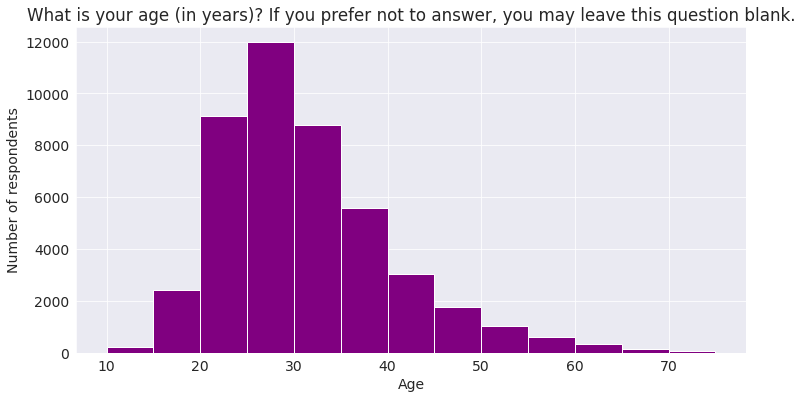

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

#### It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.



## Gender

In [ ]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [ ]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  46007
Woman                                                 3843
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

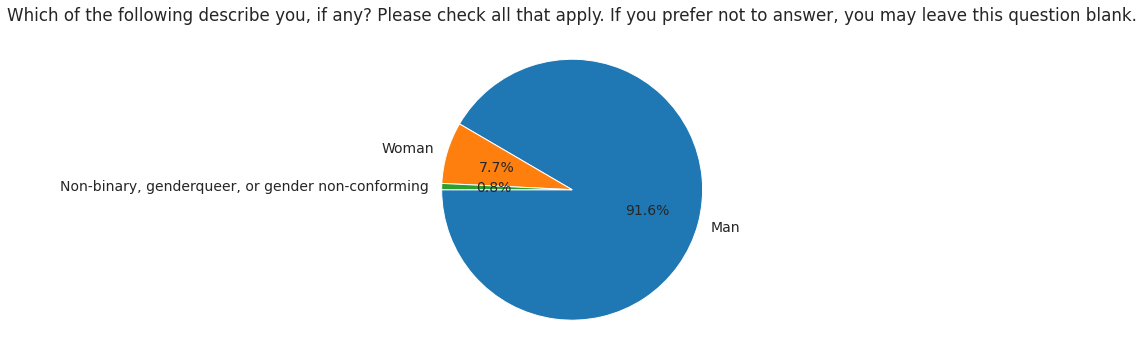

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

#### Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

In [ ]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [ ]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

In [ ]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

### Dev Type
##### The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [ ]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [ ]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                              4403
Developer, back-end                                                                                                                                                                                3069
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                     2219
Developer, back-end;Developer, full-stack                                                                                                                                                          1468
Developer, front-end                                                                                                                                                                               1395


##### Let's define a helper function that turns a column containing lists of values into a data frame with one column for each possible option

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [ ]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)/dev_type_df.sum().sum()*100
dev_type_totals

Developer, back-end                              17.351692
Developer, full-stack                            17.291465
Developer, front-end                             11.653222
Developer, desktop or enterprise applications     7.513599
Developer, mobile                                 6.046375
DevOps specialist                                 3.801329
Database administrator                            3.637948
Designer                                          3.379101
System administrator                              3.334892
Developer, embedded applications or devices       3.024789
Data or business analyst                          2.551946
Data scientist or machine learning specialist     2.531443
Developer, QA or test                             2.505814
Engineer, data                                    2.375750
Academic researcher                               2.253375
Educator                                          1.861901
Developer, game or graphics                       1.7689

##### Most common roles include developer.Data Scientist and Data analyst contribute around 4 percent .

#Asking and Answering Questions

###**Q** :How does programming experiennce change the way they feel after not getting the question which they already did?

# 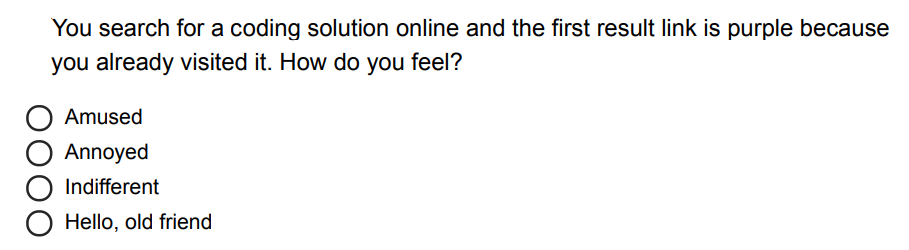

##### There are four options to choose.Lets look at the distribution of votes 

In [ ]:
survey_df['NEWPurpleLink'].value_counts()/survey_df['NEWPurpleLink'].shape[0]*100

Hello, old friend    43.589704
Indifferent          15.450497
Amused               13.438116
Annoyed              12.064980
Name: NEWPurpleLink, dtype: float64

####  40 percent of people choosed option Hello,old friend.Lets look at how many values are missing

In [ ]:
survey_df['NEWPurpleLink'].isna().sum()/survey_df['NEWPurpleLink'].shape[0]*100

15.456703542225878

#### 15 % percent of values are missing,so we cannot drop the rows.Lets create different category unknown

In [ ]:
survey_df['NEWPurpleLink']=survey_df['NEWPurpleLink'].fillna(value='Unknown')

In [ ]:
survey_df['NEWPurpleLink'].value_counts()

Hello, old friend    28094
Unknown               9962
Indifferent           9958
Amused                8661
Annoyed               7776
Name: NEWPurpleLink, dtype: int64

### Lets see if there is relation between the experience and the feeling after not solving a problem

<AxesSubplot:title={'center':'You search for a coding solution online and the first result link is purple because you already visited it. How do you feel?'}, xlabel='NEWPurpleLink', ylabel='YearsCodePro'>

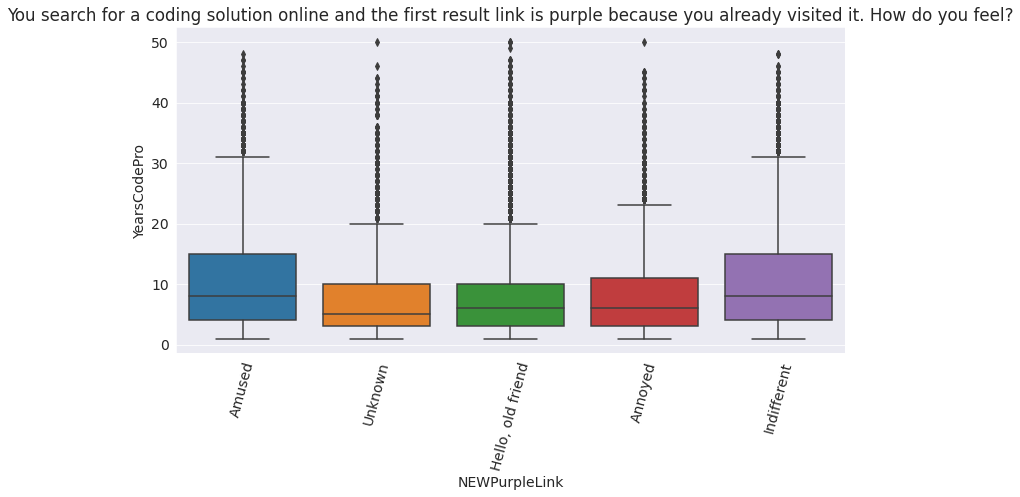

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.NEWPurpleLink)
sns.boxplot(x='NEWPurpleLink', y='YearsCodePro', data=survey_df)

######  There wasnt any significance relationship with the experience and the feeling after not solving a problem which is solved earlier.So we can say that it mostly depends on the attitude more than experience.

###How frequently does person learn new language or framework?

To answer, this we can use the NEWLearn column. 


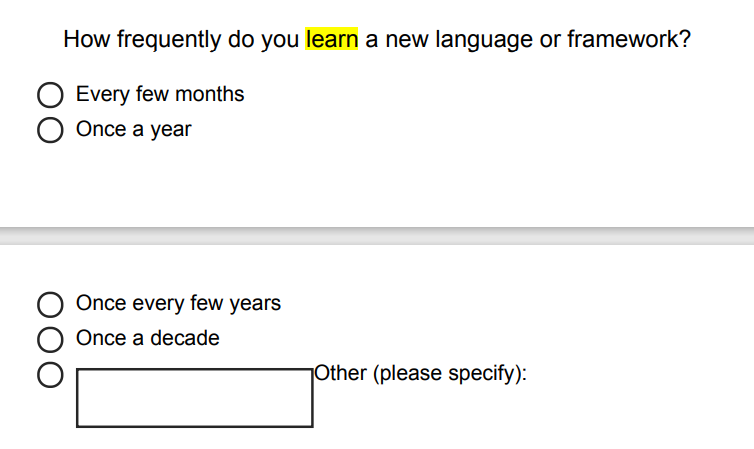


In [ ]:
survey_df['NEWLearn'].head(5)

0      Once a year
1      Once a year
2    Once a decade
3      Once a year
4      Once a year
Name: NEWLearn, dtype: object

In [ ]:
survey_df['NEWLearn'].value_counts()/survey_df['NEWLearn'].shape[0]*100

Every few months        32.283440
Once a year             31.938992
Once every few years    20.524119
Once a decade            1.917736
Name: NEWLearn, dtype: float64

In [ ]:
survey_df['NEWLearn'].isna().sum()/survey_df['NEWLearn'].shape[0]*100

13.335712401669486

In [ ]:
survey_df['NEWLearn']=survey_df['NEWLearn'].fillna(value='Unknown')

In [ ]:
survey_df['NEWLearn'].sample(10)

51900             Once a year
18628        Every few months
48227                 Unknown
41233           Once a decade
58518    Once every few years
8800     Once every few years
64324                 Unknown
27603        Every few months
52097        Every few months
16525             Once a year
Name: NEWLearn, dtype: object

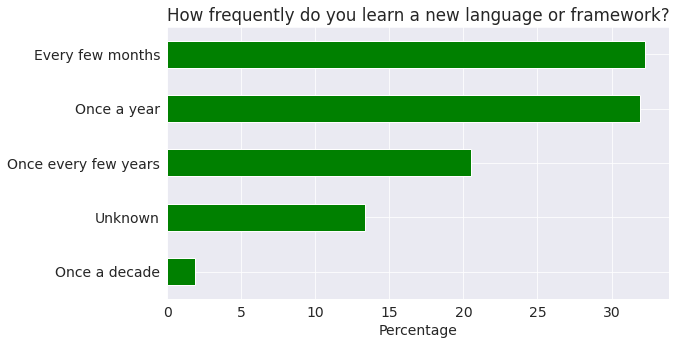

In [ ]:
(survey_df.NEWLearn.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.NEWLearn)
plt.xlabel('Percentage');

#### Around 30% of  people update the knowledge for every few months and then other 30 % of people learn for once a year.Its not surprising because to stay relevant field they need to update their knowledge regularly.

#How do people learn more about company?

#### As this question is multi optional,lets split the columns and analyze it.

In [ ]:
JobHunt_df = split_multicolumn(survey_df.NEWJobHuntResearch)

In [ ]:
JobHunt_df.head(5)

,"Read company media, such as employee blogs or company culture videos","Company reviews from third party sites (e.g. Glassdoor, Blind)",Publicly available financial information (e.g. Crunchbase),Personal network - friends or family,"Read other media like news articles, founder profiles, etc. about the company",Directly asking current or past employees at the company
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [ ]:
JobHunttotals = JobHunt_df.sum().sort_values(ascending=False)
JobHunttotals 

Company reviews from third party sites (e.g. Glassdoor, Blind)                   28396
Read company media, such as employee blogs or company culture videos             26634
Personal network - friends or family                                             25847
Read other media like news articles, founder profiles, etc. about the company    20079
Directly asking current or past employees at the company                         14740
Publicly available financial information (e.g. Crunchbase)                       10763
dtype: int64

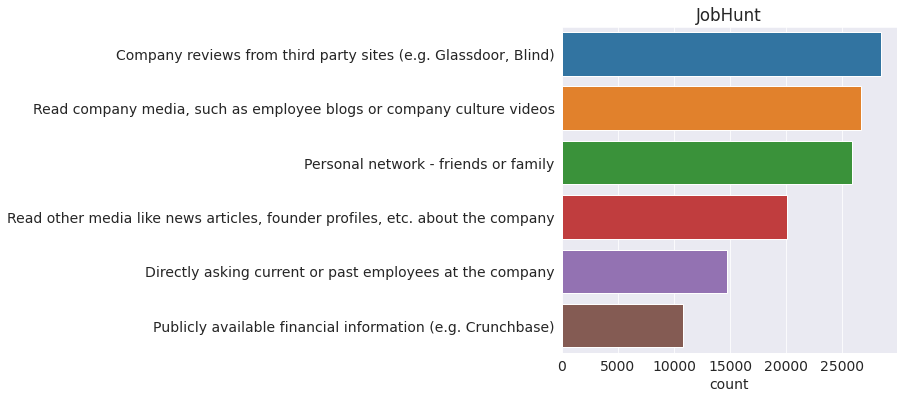

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=JobHunttotals, y=JobHunttotals.index)
plt.title("JobHunt");
plt.xlabel('count');

#### Most people learn more about companies through the third party sites like glassdoor which isn't surprising.

###How do you important is formal education,such as university degree in computer science to your career?

In [ ]:
survey_df['NEWEdImpt'].head(5)

0                      Fairly important
1                      Fairly important
2                                   NaN
3    Not at all important/not necessary
4                        Very important
Name: NEWEdImpt, dtype: object

In [ ]:
survey_df['NEWEdImpt'].value_counts()/survey_df['NEWEdImpt'].shape[0]*100

Fairly important                      19.591628
Very important                        18.327101
Somewhat important                    17.576143
Not at all important/not necessary    11.999814
Critically important                   7.335805
Name: NEWEdImpt, dtype: float64

In [ ]:
survey_df['NEWEdImpt'].isna().sum()/survey_df['NEWEdImpt'].shape[0]*100

25.169508618950832

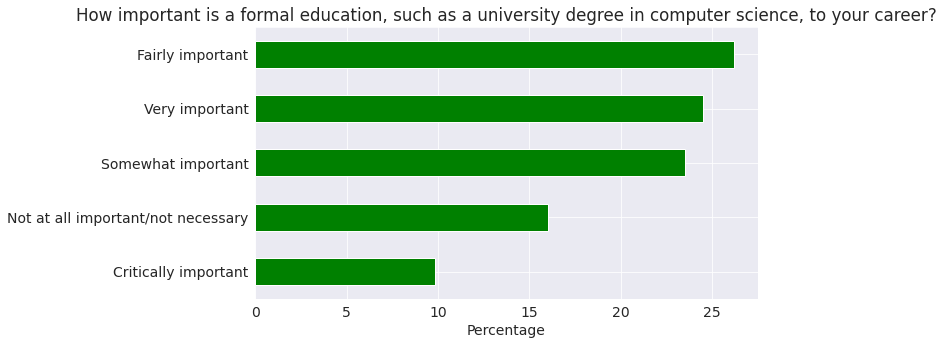

In [ ]:
(survey_df.NEWEdImpt.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.NEWEdImpt)
plt.xlabel('Percentage');

In [ ]:
dev_type_df[dev_type_df['Data scientist or machine learning specialist']==True]

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
35,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
46,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
68,False,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64401,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64407,False,True,False,False,True,True,False,False,False,True,...,True,False,True,True,True,True,True,False,False,False
64432,False,False,False,False,True,True,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
64446,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,True,True,False,True,False,False


In [ ]:
merged_df = pd.merge(survey_df, dev_type_df, left_index=True, right_index=True, how='inner')

In [ ]:
merged_df.head(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,Employment,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,"Independent contractor, freelancer, or self-em...",...,False,False,False,False,False,False,False,False,False,False
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,Employed full-time,...,False,False,False,False,False,False,False,False,False,False
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,Employed full-time,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
filtered_df=merged_df[merged_df['Data scientist or machine learning specialist']==True]

In [ ]:
filtered_df.shape

(3951, 39)

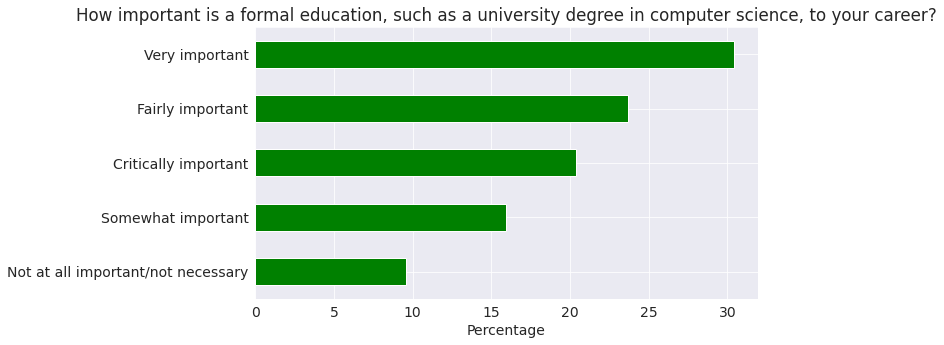

In [ ]:
(filtered_df.NEWEdImpt.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.NEWEdImpt)
plt.xlabel('Percentage');

### There is high ratio of people who think formal education is important in data science career compared to people in other careers.

###How is the ratio of different genders in data science ?

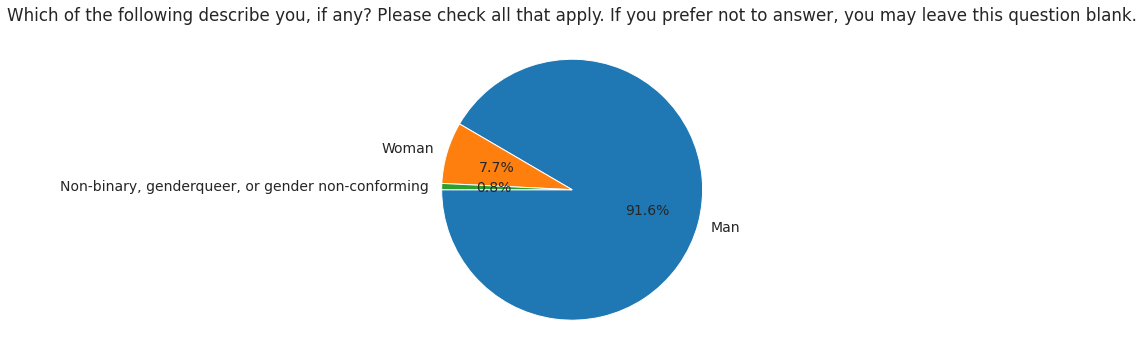

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [ ]:
filtered_df['Gender'].value_counts()

Man                                                  3056
Woman                                                 306
Non-binary, genderqueer, or gender non-conforming      23
Name: Gender, dtype: int64

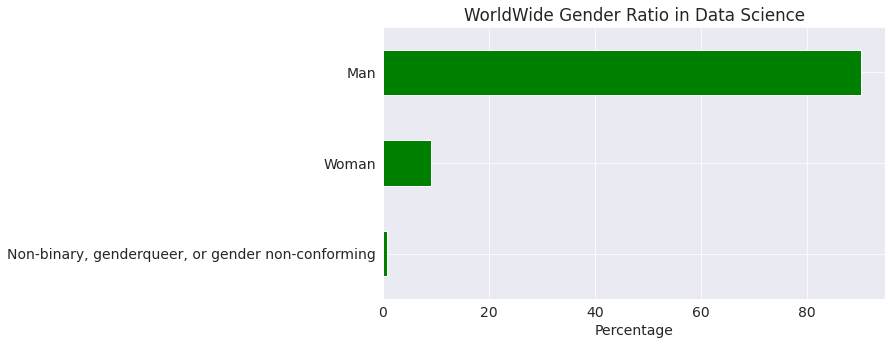

In [ ]:
(filtered_df.Gender.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title('WorldWide Gender Ratio in Data Science')
plt.xlabel('Percentage');

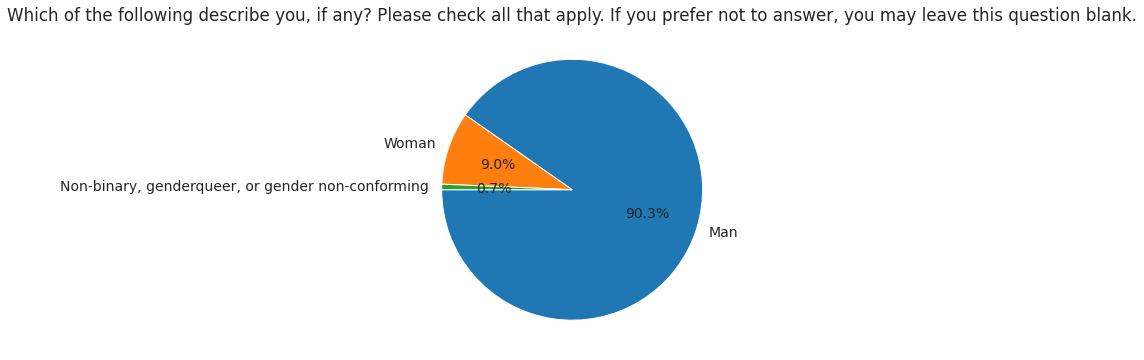

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(filtered_df['Gender'].value_counts(), labels=filtered_df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=180);

##### Woman in data science are 1% higher percentage compared to the women in all tech professionals.It shows there should be initiatives to be taken to promote diversity.

### Summary
I have drawn many inferences from the survey. Here's a summary of a few of them:

**.**Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

**.**The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

**.**Woman in data science are 1% higher percentage compared to the women in all tech professionals.It shows there should be initiatives to be taken to promote diversity.

**.**There is high ratio of people who think formal education is important in data science career compared to people in other careers.

**.**Most people learn more about companies through the third party sites like glassdoor which isn't surprising.

**.**Around 30% of  people update the knowledge for every few months and then other 30 % of people learn for once a year.Its not surprising because to stay relevant field they need to update their knowledge regularly.

**.**There wasnt any significance relationship with the experience and the feeling after not solving a problem which is solved earlier.So we can say that it mostly depends on the attitude more than experience.

**.**Most common roles include developer.Data Scientist and Data analyst contribute around 4 percent .